In [1]:
import pandas as pd
# Load the dataset
data = pd.read_csv("Allergen_Status_of_Food_Products.csv")

# Display the first few rows of the dataset for exploration
data.head()


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

In [17]:

# Preprocessing the data
data = pd.read_csv("Allergen_Status_of_Food_Products.csv")

# Fill NaN values with empty strings in the relevant columns
data = data.fillna('')

# Encoding the input features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Food Product'] + " " + 
                             data['Main Ingredient'] + " " + 
                             data['Sweetener'] + " " + 
                             data['Fat/Oil'] + " " + 
                             data['Seasoning'])

# Preparing the target variable for multi-label classification
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Allergens'].str.split(', '))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
data = pd.read_csv("Allergen_Status_of_Food_Products.csv")
prediction_counts = data['Prediction'].value_counts()
print(prediction_counts)
allergens_list = data['Allergens'].str.split(', ').explode().tolist()
allergens_counts = pd.Series(allergens_list).value_counts()
most_common_allergens = allergens_counts
print(most_common_allergens)

Prediction
Contains            256
Does not contain    143
Name: count, dtype: int64
Dairy           190
Wheat            96
Fish             20
Soybeans         17
Shellfish        16
Eggs             13
Milk              6
Nuts              5
Peanuts           5
Pine nuts         3
Cocoa             3
Pork              2
Celery            2
Chicken           2
Strawberries      2
Almonds           2
Rice              1
Mustard           1
Oats              1
Coconut           1
Ghee              1
Anchovies         1
Alcohol           1
Name: count, dtype: int64


In [70]:

# Create the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Train the model with the dense data
history = model.fit(X_train_dense, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set using the dense data
loss, accuracy = model.evaluate(X_test_dense, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Make predictions using the dense data
predictions = model.predict(X_test_dense)
model.save('ALE.h5')  # creates a HDF5 file 'ALE.h5'




Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.6745 - accuracy: 0.0353 - val_loss: 0.6500 - val_accuracy: 0.0312
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.0431 - val_loss: 0.5975 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5702 - accuracy: 0.0314 - val_loss: 0.5197 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.0745 - val_loss: 0.4149 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3914 - accuracy: 0.0941 - val_loss: 0.3036 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2934 - accuracy: 0.1647 - val_loss: 0.2170 - val_accuracy: 0.2031
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.2549 - val_loss: 0.1674 - val_accuracy: 0.5938
Epo

c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
trained_model = load_model('ALE.h5')

In [72]:
from sklearn.metrics import classification_report

# Convert predictions to binary format
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Generate classification report
report = classification_report(y_test, binary_predictions, target_names=mlb.classes_)
print(report)


              precision    recall  f1-score   support

                   0.80      0.87      0.83        23
     Alcohol       0.00      0.00      0.00         1
     Almonds       0.00      0.00      0.00         1
   Anchovies       0.00      0.00      0.00         0
      Celery       0.00      0.00      0.00         0
     Chicken       0.00      0.00      0.00         0
       Cocoa       0.00      0.00      0.00         0
     Coconut       0.00      0.00      0.00         0
       Dairy       0.98      0.89      0.93        46
        Eggs       1.00      0.80      0.89         5
        Fish       0.67      0.50      0.57         4
        Ghee       0.00      0.00      0.00         0
        Milk       1.00      1.00      1.00         2
     Mustard       0.00      0.00      0.00         1
        Nuts       0.00      0.00      0.00         2
        Oats       0.00      0.00      0.00         1
     Peanuts       0.00      0.00      0.00         0
   Pine nuts       0.00    

c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Optuna Tunning, it takes a long time. 

In [5]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Hyperparameters to be tuned by Optuna
    dropout_rate1 = trial.suggest_float('dropout_rate1', 0.1, 0.7)
    dropout_rate2 = trial.suggest_float('dropout_rate2', 0.1, 0.7)

    lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
    units_layer_1 = trial.suggest_int('units_layer_1', 64, 256)
    units_layer_2 = trial.suggest_int('units_layer_2', 32, 128)
    activation_function1 = trial.suggest_categorical('activation1', ['relu', 'sigmoid', 'tanh'])
    activation_function2 = trial.suggest_categorical('activation2', ['relu', 'sigmoid', 'tanh'])

    # Model architecture
    model = Sequential()
    model.add(Dense(units_layer_1, input_dim=X_train.shape[1], activation=activation_function1))
    model.add(Dropout(dropout_rate1))
    model.add(Dense(units_layer_2, activation=activation_function2))
    model.add(Dropout(dropout_rate2))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model
def objective(trial):
    accuracies = []
    for _ in range(3):  # Train and evaluate the model 3 times
        # Create and train model
        model = create_model(trial)
        X_train_dense = X_train.toarray()  # Assuming X_train is in sparse format
        model.fit(X_train_dense, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)

        # Evaluate the model
        X_test_dense = X_test.toarray()  # Assuming X_test is in sparse format
        loss, accuracy = model.evaluate(X_test_dense, y_test, verbose=0)
        accuracies.append(accuracy)
        average_accuracy = sum(accuracies) / len(accuracies)

    # Return the average accuracy
    return average_accuracy

# Optuna study (maximize accuracy)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Output best trial information
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
best_trial = study.best_trial



c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-03 21:29:54,631] A new study created in memory with name: no-name-158697de-f6eb-42ad-8400-d789306367d8
[I 2023-12-03 21:31:18,650] Trial 0 finished with value: 0.737499992052714 and parameters: {'dropout_rate1': 0.5281988121370211, 'dropout_rate2': 0.2865211426565934, 'lr': 1.2335653671939024e-05, 'units_layer_1': 176, 'units_layer_2': 58, 'activation1': 'tanh', 'activation2': 'tanh'}. Best is trial 0 with value: 0.737499992052714.
[I 2023-12-03 21:32:50,334] Trial 1 finished with value: 0.8500000238418579 and parameters: {'dropout_rate1': 0.6179582193865196, 'dropout_rate2': 0.46288457621385315, 'lr': 6.661717011539775e-05, 'units_layer_1': 256, 'units_layer_2': 90, 'activation1': 'relu', 'activation2': 'relu'}. Best 

Number of finished trials: 500
Best trial: {'dropout_rate1': 0.21584836487802678, 'dropout_rate2': 0.6692543310734468, 'lr': 0.0028785544123480908, 'units_layer_1': 202, 'units_layer_2': 124, 'activation1': 'relu', 'activation2': 'relu'}


In [21]:
# Train final model with best hyperparameters
best_model = create_model(best_trial)
X_train_dense = X_train.toarray()
best_model_history = best_model.fit(X_train_dense, y_train, epochs=1000, batch_size=32, validation_split=0.2)
loss, accuracy = best_model.evaluate(X_test_dense, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Save the final model
best_model.save('best_model.h5')

Epoch 1/1000
8/8 [==============================] - 1s 19ms/step - loss: 0.5808 - accuracy: 0.1137 - val_loss: 0.3603 - val_accuracy: 0.5469
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.3059 - val_loss: 0.1406 - val_accuracy: 0.5000
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.4314 - val_loss: 0.1456 - val_accuracy: 0.6406
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1612 - accuracy: 0.4745 - val_loss: 0.1321 - val_accuracy: 0.6719
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1240 - accuracy: 0.5569 - val_loss: 0.1121 - val_accuracy: 0.7344
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1092 - accuracy: 0.5843 - val_loss: 0.1011 - val_accuracy: 0.7500
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.7059 - val_loss: 0.0935 - val_accuracy: 0.7500
Epoch 8/1000
8/8 [=

In [83]:
best_model.save('9375.h5')

c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
best_predictions = model.predict(X_test_dense)


3/3 [==============================] - 0s 6ms/step


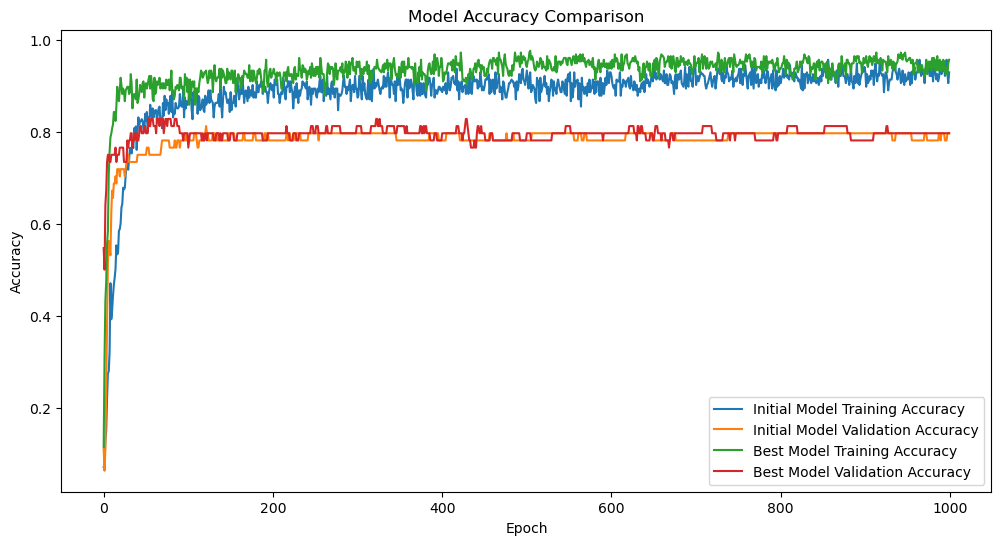

In [22]:
import matplotlib.pyplot as plt

# Plotting accuracies
plt.figure(figsize=(12, 6))

# Initial Model
plt.plot(history.history['accuracy'], label='Initial Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Model Validation Accuracy')

# Best Model
plt.plot(best_model_history.history['accuracy'], label='Best Model Training Accuracy')
plt.plot(best_model_history.history['val_accuracy'], label='Best Model Validation Accuracy')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [23]:
import numpy as np
# Load the initial and final models
initial_model = load_model('ALE.h5')
final_model = load_model('best_model.h5')

# Function to get feature importance from a model
def get_feature_importance(model, vectorizer):
    # Get the weights of the first Dense layer
    weights = model.layers[0].get_weights()[0]
    
    # Sum the absolute values of weights for each feature
    feature_importance = np.sum(np.abs(weights), axis=1)
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    return importance_df

# Get feature importance for both models
initial_importance = get_feature_importance(initial_model, vectorizer)
final_importance = get_feature_importance(final_model, vectorizer)

# Display top 10 important features for each model
print("Initial Model Feature Importance:")
print(initial_importance.head(10))

print("\nBest Model Feature Importance:")
print(final_importance.head(10))


Initial Model Feature Importance:
         Feature  Importance
117         eggs   28.421497
293  ratatouille   25.105045
111        dough   24.637199
131        flour   24.370441
179      lasagna   23.995010
252       peanut   23.660744
60   caramelized   23.620630
263          pie   23.485458
97      croutons   23.144079
281   quesadilla   22.918968

Best Model Feature Importance:
      Feature  Importance
117      eggs   60.963745
131     flour   46.648193
385      wrap   43.477741
327    shrimp   43.449097
97   croutons   42.760468
275     prawn   42.303341
276    prawns   42.185421
230     olive   41.294163
252    peanut   40.831917
260     pesto   40.778690


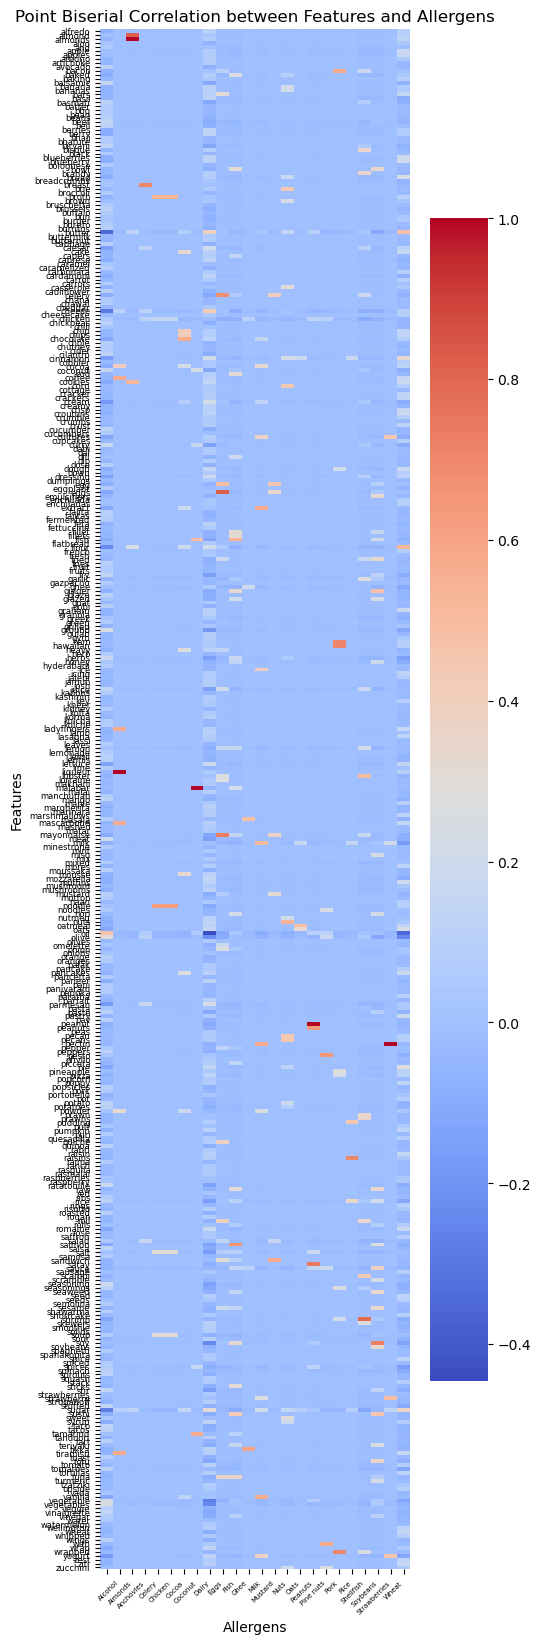

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pointbiserialr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Allergen_Status_of_Food_Products.csv")

# Fill NaN values with empty strings in the relevant columns
data = data.fillna('')

# Encoding the input features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Food Product'] + " " + 
                             data['Main Ingredient'] + " " + 
                             data['Sweetener'] + " " + 
                             data['Fat/Oil'] + " " + 
                             data['Seasoning'])

# Preparing the target variable for multi-label classification
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Allergens'].str.split(', '))

# Function to calculate point biserial correlation
def calculate_point_biserial_correlation(X, y):
    correlation_matrix = np.zeros((X.shape[1], y.shape[1]))
    for i in range(X.shape[1]):
        for j in range(y.shape[1]):
            correlation, _ = pointbiserialr(X[:, i].toarray().ravel(), y[:, j])
            correlation_matrix[i, j] = correlation
    return correlation_matrix

# Calculate the correlation matrix
correlation_matrix = calculate_point_biserial_correlation(X, y)

# Get the names of the allergens
allergen_names = mlb.classes_

# Plotting the correlation matrix with smaller font sizes
plt.figure(figsize=(5, 20))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=allergen_names, yticklabels=vectorizer.get_feature_names_out())
ax.set_xlabel('Allergens', fontsize=10)
ax.set_ylabel('Features', fontsize=10)
ax.set_title('Point Biserial Correlation between Features and Allergens', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.yticks(rotation=0, fontsize=6)
plt.show()


In [47]:
from sklearn.metrics import classification_report

# Convert predictions to binary format
binary_predictions = np.where(best_predictions > 0.5, 1, 0)

# Generate classification report
report = classification_report(y_test, binary_predictions, target_names=mlb.classes_)
print(report)


              precision    recall  f1-score   support

                   0.81      0.96      0.88        23
     Alcohol       0.00      0.00      0.00         1
     Almonds       0.00      0.00      0.00         1
   Anchovies       0.00      0.00      0.00         0
      Celery       0.00      0.00      0.00         0
     Chicken       0.00      0.00      0.00         0
       Cocoa       0.00      0.00      0.00         0
     Coconut       0.00      0.00      0.00         0
       Dairy       1.00      0.87      0.93        46
        Eggs       1.00      0.60      0.75         5
        Fish       0.67      0.50      0.57         4
        Ghee       0.00      0.00      0.00         0
        Milk       1.00      1.00      1.00         2
     Mustard       0.00      0.00      0.00         1
        Nuts       0.00      0.00      0.00         2
        Oats       0.00      0.00      0.00         1
     Peanuts       0.00      0.00      0.00         0
   Pine nuts       0.00    

c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rjh20\.conda\envs\170Project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using the untuned model

In [37]:
trained_model = load_model('ALE.h5')
def predict_allergens_with_user_input(model, vectorizer, mlb, threshold=0.5):
    """
    Predicts allergens in a given food product based on user inputted ingredients
    and provides the likelihood of each allergen.

    Parameters:
    - model: Trained machine learning model for prediction.
    - vectorizer: CountVectorizer fitted on the training data.
    - mlb: MultiLabelBinarizer fitted on the training data.
    - threshold: Threshold for predicting the presence of an allergen (default is 0.5).

    Returns:
    - A dictionary with allergens and their likelihood.
    """

    # User input
    food_product = input("Enter Food Product Name: ")
    main_ingredient = input("Enter Main Ingredient: ")
    sweetener = input("Enter Sweetener (or None): ")
    fat_oil = input("Enter Fat/Oil (or None): ")
    seasoning = input("Enter Seasoning (or None): ")

    # Combining the input data and transforming it using the vectorizer
    combined_input = vectorizer.transform([f"{food_product} {main_ingredient} {sweetener} {fat_oil} {seasoning}"])

    # Getting model predictions
    pred_probabilities = model.predict(combined_input.toarray())[0]

    # Creating a dictionary of allergen probabilities
    allergen_probabilities = {allergen: prob for allergen, prob in zip(mlb.classes_, pred_probabilities)}
    if '' in allergen_probabilities and allergen_probabilities[''] > threshold:
        return f"Does not contain allergens (Probability: {allergen_probabilities['']:.6f})"
    # Filtering to include only allergens with probability above the threshold
    
    likely_allergens = {allergen: prob for allergen, prob in allergen_probabilities.items() if prob > threshold}
    if '' in likely_allergens:
        return f"Does not contain allergens (Probability: {allergen_probabilities['']:.6f})"
    else: 
        return likely_allergens
  

allergen_predictions = predict_allergens_with_user_input(trained_model, vectorizer, mlb)
allergen_predictions


1/1 [==============================] - 0s 40ms/step


'Does not contain allergens (Probability: 0.993155)'

### Using Tuned model

In [30]:
best_trained_model = load_model('best_model.h5')

In [45]:
def predict_allergens_with_user_input(model, vectorizer, mlb, threshold=0):
    """
    Predicts allergens in a given food product based on user inputted ingredients
    and provides the likelihood of each allergen.

    Parameters:
    - model: Trained machine learning model for prediction.
    - vectorizer: CountVectorizer fitted on the training data.
    - mlb: MultiLabelBinarizer fitted on the training data.
    - threshold: Threshold for predicting the presence of an allergen (default is 0.5).

    Returns:
    - A dictionary with allergens and their likelihood.
    """

    # User input
    food_product = input("Enter Food Product Name: ")
    main_ingredient = input("Enter Main Ingredient: ")
    sweetener = input("Enter Sweetener (or None): ")
    fat_oil = input("Enter Fat/Oil (or None): ")
    seasoning = input("Enter Seasoning (or None): ")

    # Combining the input data and transforming it using the vectorizer
    combined_input = vectorizer.transform([f"{food_product} {main_ingredient} {sweetener} {fat_oil} {seasoning}"])

    # Getting model predictions
    pred_probabilities = model.predict(combined_input.toarray())[0]

    # Creating a dictionary of allergen probabilities
    allergen_probabilities = {allergen: prob for allergen, prob in zip(mlb.classes_, pred_probabilities)}
    if '' in allergen_probabilities and allergen_probabilities[''] > threshold:
        return f"Does not contain allergens (Probability: {allergen_probabilities['']:.6f})"
    # Filtering to include only allergens with probability above the threshold
    
    likely_allergens = {allergen: prob for allergen, prob in allergen_probabilities.items() if prob > threshold}
    if '' in likely_allergens:
        return f"Does not contain allergens (Probability: {allergen_probabilities['']:.6f})"
    else: 
        return likely_allergens
  

allergen_predictions = predict_allergens_with_user_input(best_trained_model, vectorizer, mlb)
allergen_predictions

1/1 [==============================] - 0s 13ms/step


'Does not contain allergens (Probability: 0.001294)'